## Algoritmo de colonia de hormigas


### Introduction
The ant colony optimization algorithms are a family of heuristic and probabilistic optimization algorithms based on swarm intelligence of simple computational agents. This kind of algorithms is widely used in the resolution of graph-based problem, and one common use for them is the resolution of the TSP. The algorithm simulates the paths taking by several decision agents known as "ants" during a number of determined iterations


The code presented int his blog was adapted from :

Wong, C. (2020) Black Desert Online Worker Optimization. Available at : https://cwong8.github.io/projects/BDO_Optimization/optimization/ Accesed: February 25 2020.

### Data representation
The two most common ways to represent graphs are adjacency lists or weight matrix. Because the TSP is represented by a weighted undirected graph, is convenient to represent an instance of the problem using a weight matrix, that represents the distances between each node of the graph. In pythom, a very simple instance of the TSP could be represented by something like this:

```
distances = np.array([[np.inf, 2, 2, 5, 7],
                      [2, np.inf, 4, 8, 2],
                      [2, 4, np.inf, 1, 3],
                      [5, 8, 1, np.inf, 2],
                      [7, 2, 3, 2, np.inf]])
```



### Data Import

In [ ]:
with open("/home/storreglosa/Projects/03_Metaheuristicas_transporte/Genetic_Algoritm_Vehicle_Routing/sample_data/gr120.json", "r") as tsp_data:
    tsp = json.load(tsp_data)

distance_map = tsp["DistanceMatrix"]

IND_SIZE = tsp["TourSize"]

### Libraries

In [3]:
import random as rn
import numpy as np
from numpy.random import choice as np_choice
from math import sqrt
import matplotlib.pyplot as plt
import json

### Algorithm

In [4]:
class AntColony(object):

    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        """
        Args:
            distances (2D numpy.array): Square matrix of distances. Diagonal is assumed to be np.inf.
            n_ants (int): Number of ants running per iteration
            n_best (int): Number of best ants who deposit pheromone
            n_iteration (int): Number of iterations
            decay (float): Rate it which pheromone decays. The pheromone value is multiplied by decay, so 0.95 will lead to decay, 0.5 to much faster decay.
            alpha (int or float): exponenet on pheromone, higher alpha gives pheromone more weight. Default=1
            beta (int or float): exponent on distance, higher beta give distance more weight. Default=1
        Example:
            ant_colony = AntColony(distances, 100, 20, 2000, 0.95, alpha=1, beta=2)          
        """
        self.distances  = distances
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self):
        distance_logs=[]
        shortest_path = None
        all_time_shortest_path = ("placeholder", np.inf)
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheronome(all_paths, self.n_best, shortest_path=shortest_path)
            shortest_path = min(all_paths, key=lambda x: x[1])
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path
            distance_logs.append(all_time_shortest_path[1])                      
        return all_time_shortest_path,distance_logs

    def spread_pheronome(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in path:
                self.pheromone[move] += 1.0 / self.distances[move]

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in path:
            total_dist += self.distances[ele]
        return total_dist

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        for i in range(len(self.distances) - 1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append((prev, move))
            prev = move
            visited.add(move)
        path.append((prev, start)) # going back to where we started    
        return path

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0

        row = (pheromone ** self.alpha) * (( 1.0 / dist) ** self.beta)

        norm_row = row / row.sum()
        move = np_choice(self.all_inds, 1, p=norm_row)[0]
        return move



### TEST

shortest_path: ([(0, 75), (75, 28), (28, 29), (29, 31), (31, 91), (91, 27), (27, 119), (119, 60), (60, 14), (14, 58), (58, 44), (44, 77), (77, 93), (93, 80), (80, 85), (85, 13), (13, 86), (86, 73), (73, 104), (104, 15), (15, 59), (59, 23), (23, 110), (110, 95), (95, 53), (53, 89), (89, 54), (54, 5), (5, 83), (83, 34), (34, 9), (9, 98), (98, 103), (103, 35), (35, 111), (111, 109), (109, 47), (47, 101), (101, 100), (100, 79), (79, 26), (26, 52), (52, 4), (4, 62), (62, 56), (56, 82), (82, 38), (38, 76), (76, 63), (63, 94), (94, 96), (96, 11), (11, 87), (87, 108), (108, 20), (20, 92), (92, 1), (1, 114), (114, 10), (10, 50), (50, 22), (22, 8), (8, 81), (81, 2), (2, 118), (118, 3), (3, 33), (33, 25), (25, 69), (69, 115), (115, 7), (7, 70), (70, 46), (46, 88), (88, 105), (105, 36), (36, 61), (61, 66), (66, 72), (72, 113), (113, 102), (102, 37), (37, 6), (6, 55), (55, 40), (40, 97), (97, 41), (41, 16), (16, 48), (48, 117), (117, 49), (49, 45), (45, 19), (19, 106), (106, 112), (112, 68), (68, 6

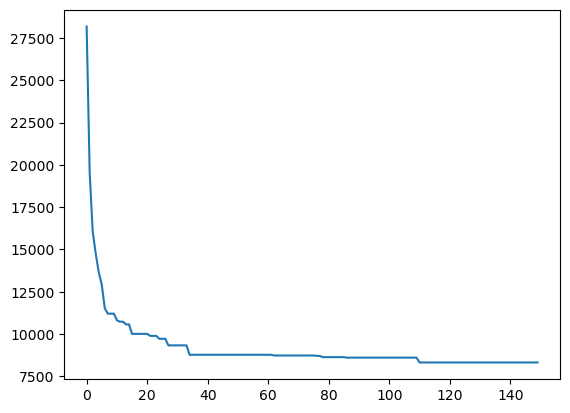

In [7]:
#Static TSP Instance
# distances = np.array([[np.inf, 2, 2, 5, 7],
#                       [2, np.inf, 4, 8, 2],
#                       [2, 4, np.inf, 1, 3],
#                       [5, 8, 1, np.inf, 2],
#                       [7, 2, 3, 2, np.inf]])


#Dinamic TSP Instance, changing the value of n_nodes will change the
#Instance size
# n_nodes=100
# dist=lambda x,y: sqrt(((x[0]-y[0])**2)+((x[1]-y[1])**2))
# l=[(rn.random()*1000,rn.random()*1000) for i in range(n_nodes)]
# distances=np.array([[np.inf if i==j else dist(l[i],l[j]) for i in range(len(l))] for j in range(len(l))])


#Presolved TSP Instance
with open("/home/storreglosa/Projects/03_Metaheuristicas_transporte/Genetic_Algoritm_Vehicle_Routing/sample_data/gr120.json", "r") as tsp_data:
    tsp = json.load(tsp_data)

distances = tsp["DistanceMatrix"]
tour_size=tsp["TourSize"]
for i in range(tour_size):
  distances[i][i]=np.inf
distances=np.array(distances)




ant_colony = AntColony(distances, 50, 50, 150, 0.7, alpha=1, beta=1)
shortest_path,log = ant_colony.run()
print ("shortest_path: {}".format(shortest_path))
plt.plot(log)
plt.show()